2025-03-02 22:22:18.630910: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Text(0, 0.5, 'X2')

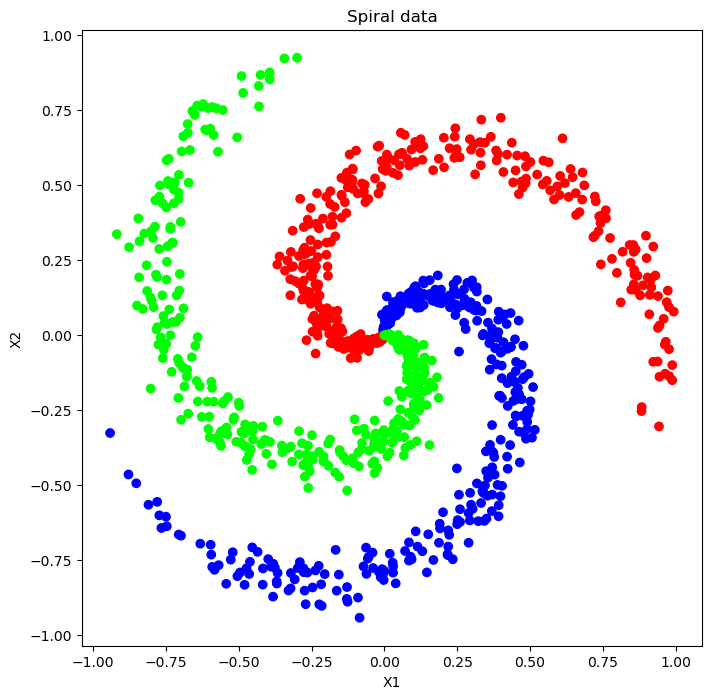

In [1]:
### Loading the packages
import numpy as np # Creating arrays and scientific computing
import matplotlib.pyplot as plt  # for plotting
from sklearn.model_selection import train_test_split # to split the data into training and testing
from sklearn.preprocessing import StandardScaler # this helps to subtract the mean and normalize the data for both training and testing the data
import tensorflow as tf
from tensorflow.keras.models import Sequential # to chain the different layers together
from tensorflow.keras.layers import Dense # to create fully connected dense neural network


# Function to generate Spiral data
def generate_spiral_data(n_points, n_classes):
    X=[]
    y=[]
    for class_number in range(n_classes): 
        ix=range(n_points*class_number,n_points*(class_number+1))
        r=np.linspace(0.,1,n_points) # radius
        t=np.linspace(class_number*4,(class_number+1)*4,n_points)+np.random.randn(n_points)*0.2
        X.extend(np.c_[r*np.sin(t),r*np.cos(t)])
        y.extend([class_number]*n_points)
    return np.array(X),np.array(y)

# generate spiral data points
X,y=generate_spiral_data(333,3) ## total=999 points, 3 classes (red, blue, green)


### Plot the spiral data
plt.figure(figsize=(8,8))
plt.scatter(X[:,0],X[:,1], c=y, cmap='brg')
plt.title('Spiral data')
plt.xlabel('X1')
plt.ylabel('X2')




In [2]:
X

array([[-0.        ,  0.        ],
       [ 0.00093609,  0.0028629 ],
       [ 0.00154197,  0.00582341],
       ...,
       [-0.49078426,  0.8643604 ],
       [-0.6594154 ,  0.74776755],
       [-0.64273994,  0.76608444]])

In [45]:
## Split the data into test and training
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42) # random_state helps us to initialize the same way every single time

## Initialize the scalar
scalar=StandardScaler()

## Fit the scalar in training data
scalar.fit(X_train)

## Transform the train and test data
X_train_scaled=scalar.transform(X_train) ## using scalar.transform, it accelerates the training process
X_test_scaled=scalar.transform(X_test)

## define the model
model=Sequential()
model.add(Dense(64,input_dim=2, activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(3,activation='softmax'))



/Users/gopikagupta/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
X_train_scaled

array([[-0.07529237, -0.79372157],
       [-0.87579334, -1.90612303],
       [ 1.14259248, -0.43740688],
       ...,
       [-0.63713876, -1.24979132],
       [-0.57709776,  0.49789593],
       [ 0.77132879,  0.13787516]])

In [50]:
## Compiling the model
#model.compile(optimizer="adam", loss='sparse_categorical_crossentropy',metrics=['accuracy']) # we will be looking at accuracy when looking at model
model.compile(optimizer=tf.keras.optimizers.SGD(momentum=0.9), loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
### Fit the model
history=model.fit(x=X_train_scaled,y=y_train,validation_data=(X_test_scaled,y_test),epochs=50,verbose=1)
# if plot saturates, it means we dont need these many epochs so epoch=50 works whereas at epoch=200, it saturates.

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9866 - loss: 0.0528 - val_accuracy: 0.9900 - val_loss: 0.0616
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9934 - loss: 0.0492 - val_accuracy: 0.9850 - val_loss: 0.0671
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9850 - loss: 0.0463 - val_accuracy: 0.9900 - val_loss: 0.0662
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9954 - loss: 0.0458 - val_accuracy: 0.9900 - val_loss: 0.0610
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9958 - loss: 0.0420 - val_accuracy: 0.9900 - val_loss: 0.0589
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9935 - loss: 0.0431 - val_accuracy: 0.9900 - val_loss: 0.0606
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9959 - loss: 0.0464 - val_accuracy: 0.9900 - val_loss: 0.0605
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9949 - loss: 0.0395 - val_accuracy: 0.9900 - val_

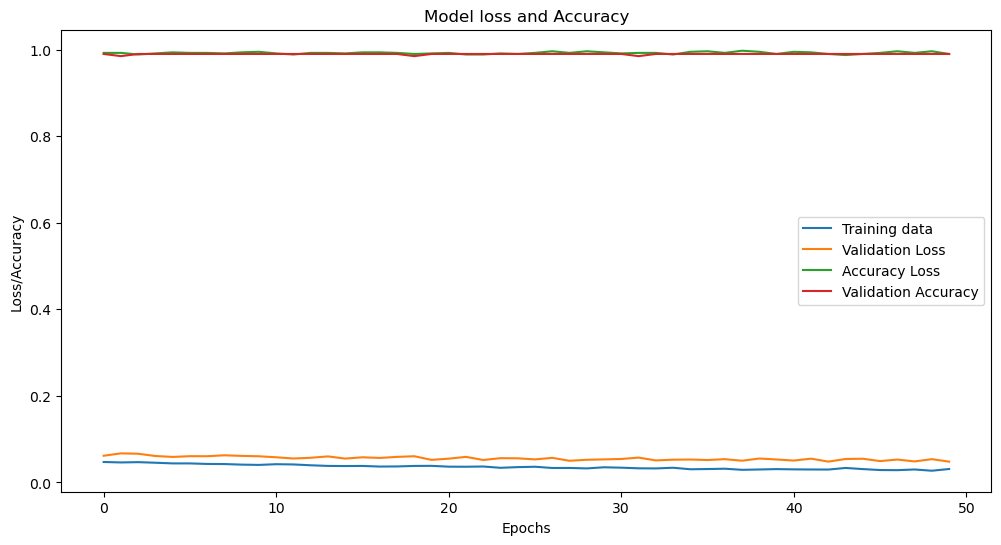

In [52]:
# Plot the trainig history
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'],label='Training data')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.plot(history.history['accuracy'],label='Accuracy Loss')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title('Model loss and Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


Text(0.5, 1.0, 'Predicted Classes')

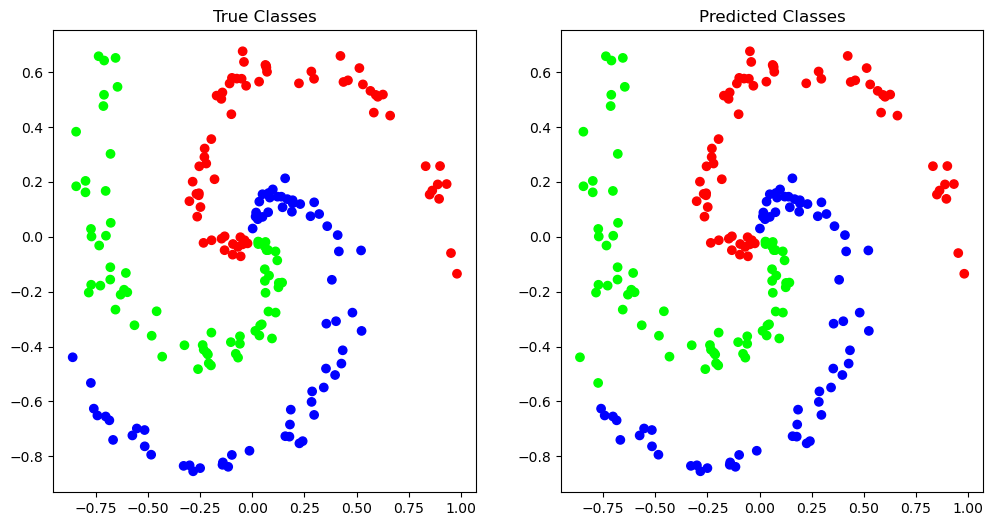

In [23]:
# Predict the class for test data
y_pred=np.argmax(model.predict(X_test_scaled),axis=1)

## PLot the comparison of prediction
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,cmap='brg')
plt.title('True Classes')
plt.subplot(1,2,2)
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred,cmap='brg')
plt.title('Predicted Classes')
plt.show() # see our NN is working perfectly

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


Text(0, 0.5, 'X2')

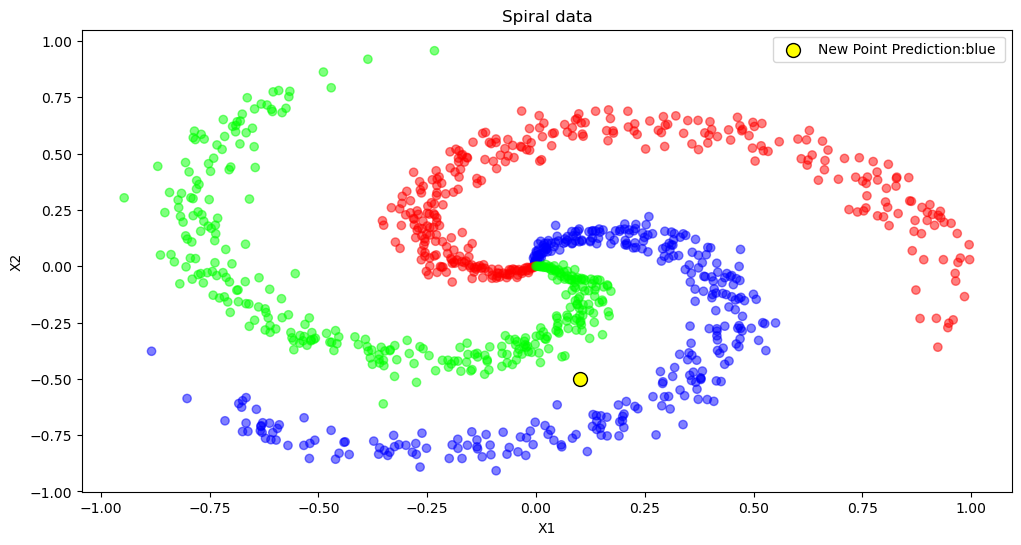

In [54]:
# New test points
new_point=np.array([[0.1,-0.5]])
new_point_scaled=scalar.transform(new_point)
new_pred=np.argmax(model.predict(new_point_scaled),axis=1)

### Color map for legend
color_map={0:'red', 1:'green', 2:'blue'}


## Plot the new point preduction
plt.figure(figsize=(12,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='brg',alpha=0.5)
plt.scatter(new_point[:,0],new_point[:,1],c='yellow',edgecolors='black',s=100, label=f'New Point Prediction:{color_map[new_pred[0]]} ')
plt.legend()
plt.title('Spiral data with New test point')
plt.title('Spiral data')
plt.xlabel('X1')
plt.ylabel('X2')